In [ ]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# geopandas 및 관련 패키지 설치
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
gdf_pt = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_mbris_obis_edu_light2.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220833 entries, 0 to 220832
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   spc_scitf_nm  220833 non-null  object  
 1   comm_kor_nm   163598 non-null  object  
 2   genus         220681 non-null  object  
 3   genus_nm      164667 non-null  object  
 4   family        220727 non-null  object  
 5   family_nm     163772 non-null  object  
 6   order_        220742 non-null  object  
 7   order_nm      162672 non-null  object  
 8   class         220809 non-null  object  
 9   class_nm      171786 non-null  object  
 10  phylum        220811 non-null  object  
 11  phylum_nm     206406 non-null  object  
 12  kingdom       220833 non-null  object  
 13  kingdom_nm    220833 non-null  object  
 14  lati_val      220833 non-null  float64 
 15  loti_val      220833 non-null  float64 
 16  col_bg_dt     220833 non-null  object  
 17  ssea_id       220833 

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Mucor circinelloides,NaN,Mucor,NaN,Mucoraceae,NaN,Mucorales,NaN,Mucoromycetes,NaN,...,NaN,Fungi,균계,38.481861,128.438194,20160802,EM,5055-3,mbris,POINT (128.43819 38.48186)
1,Paralinhomoeus gerlachi,NaN,Paralinhomoeus,NaN,Linhomoeidae,NaN,Monhysterida,NaN,Chromadorea,NaN,...,선형동물문,Animalia,동물계,38.269869,128.557564,20160415,EM,55-4,mbris,POINT (128.55756 38.26987)
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,38.271903,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190)
3,Botrytis cinerea,NaN,Botrytis,NaN,Sclerotiniaceae,NaN,Helotiales,NaN,Leotiomycetes,NaN,...,NaN,Fungi,균계,38.153361,128.608306,19000100,EM,55-7,mbris,POINT (128.60831 38.15336)
4,Trichoderma,NaN,Trichoderma,NaN,Hypocreaceae,NaN,Hypocreales,NaN,Sordariomycetes,NaN,...,NaN,Fungi,균계,37.858556,128.854389,20160926,EM,62-3,mbris,POINT (128.85439 37.85856)


In [ ]:
# "문"이 '태형동물'인 것을 추출
gdf_pt2 = gdf_pt[ gdf_pt['phylum'] == 'Bryozoa' ]
gdf_pt2.info()
gdf_pt2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2966 entries, 48 to 218509
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  2966 non-null   object  
 1   comm_kor_nm   2873 non-null   object  
 2   genus         2964 non-null   object  
 3   genus_nm      2762 non-null   object  
 4   family        2966 non-null   object  
 5   family_nm     2786 non-null   object  
 6   order_        2966 non-null   object  
 7   order_nm      2966 non-null   object  
 8   class         2966 non-null   object  
 9   class_nm      2966 non-null   object  
 10  phylum        2966 non-null   object  
 11  phylum_nm     2966 non-null   object  
 12  kingdom       2966 non-null   object  
 13  kingdom_nm    2966 non-null   object  
 14  lati_val      2966 non-null   float64 
 15  loti_val      2966 non-null   float64 
 16  col_bg_dt     2966 non-null   object  
 17  ssea_id       2966 non-null   object  
 1

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
48,Adeonella lichenoides,넓적부리이끼벌레,Adeonella,아데오넬라속,Adeonidae,사슴뿔이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
49,Adeonella lichenoides,넓적부리이끼벌레,Adeonella,아데오넬라속,Adeonidae,사슴뿔이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
50,Adeonella lichenoides,넓적부리이끼벌레,Adeonella,아데오넬라속,Adeonidae,사슴뿔이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
51,Adeonella lichenoides,넓적부리이끼벌레,Adeonella,아데오넬라속,Adeonidae,사슴뿔이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
52,Adeonella lichenoides,넓적부리이끼벌레,Adeonella,아데오넬라속,Adeonidae,사슴뿔이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)


In [ ]:
# '태형동물'에 대해 '종'별 건수를 보고 싶다면
# value_counts : 기준 항목에 대한 고유 건수를 볼 수 있는 pandas의 함수
# reset_index : 인덱스를 reset해서 데이터프레임 형태로 만들어 줌 
gdf_pt3 = gdf_pt2.comm_kor_nm.value_counts().reset_index()
gdf_pt3.columns = ['comm_kor_nm', 'count']
gdf_pt3.info()
gdf_pt3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comm_kor_nm  152 non-null    object
 1   count        152 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


,comm_kor_nm,count
0,큰다발이끼벌레,217
1,자주빛이끼벌레,212
2,세방가시이끼벌레,148
3,넓적부리이끼벌레,101
4,숨은이끼벌레,97


In [ ]:
# 속성 선택 반복 학습 
# "동물계" 이고 "군소속"에 해당하는 데이터 선택
gdf_pt4 = gdf_pt[ (gdf_pt['kingdom_nm'] == '동물계') & (gdf_pt['genus_nm'] == '군소속') ]
#저장할 객체명 = 객체명[ (A 조건) & (B 조건) ]
gdf_pt4.info()
gdf_pt4.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 145 entries, 2 to 220394
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  145 non-null    object  
 1   comm_kor_nm   145 non-null    object  
 2   genus         145 non-null    object  
 3   genus_nm      145 non-null    object  
 4   family        145 non-null    object  
 5   family_nm     145 non-null    object  
 6   order_        145 non-null    object  
 7   order_nm      0 non-null      object  
 8   class         145 non-null    object  
 9   class_nm      145 non-null    object  
 10  phylum        145 non-null    object  
 11  phylum_nm     145 non-null    object  
 12  kingdom       145 non-null    object  
 13  kingdom_nm    145 non-null    object  
 14  lati_val      145 non-null    float64 
 15  loti_val      145 non-null    float64 
 16  col_bg_dt     145 non-null    object  
 17  ssea_id       145 non-null    object  
 18 

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,38.271903,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190)
7301,Aplysia oculifera,안경무늬군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,33.224803,126.472297,20160630,SW,232-6,mbris,POINT (126.47230 33.22480)
7302,Aplysia parvula,검은테군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,33.224803,126.472297,20170630,SW,232-6,mbris,POINT (126.47230 33.22480)
7303,Aplysia oculifera,안경무늬군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,33.224803,126.472297,20170630,SW,232-6,mbris,POINT (126.47230 33.22480)
7304,Aplysia parvula,검은테군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,NaN,Gastropoda,복족강,...,연체동물문,Animalia,동물계,33.224803,126.472297,20160629,SW,232-6,mbris,POINT (126.47230 33.22480)


In [ ]:
# geopandas.explore를 이용한 지도화
gdf_pt4.explore('comm_kor_nm',  marker_type='circle_marker', marker_kwds=dict(radius=4), categorical=True, tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}&s=Ga', attr='google')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') #한글 폰트 적용

In [ ]:
# geopandas에서 전세계 국가 경계 데이터를 제공하고 있음. 이 공간데이터를 읽기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres') )
world.info()
world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


<ipython-input-11-ff4f0989b86f>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres') )


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# world에서 대한민국만 추출
korea = world.query('iso_a3 == "KOR"')
korea

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
96,51709098.0,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."


만약, 범례의 한글이 보이지 않는 경우, 런타임 메뉴 > 런타임 다시 시작 및 모두 실행을 클릭해 주십시오

<Axes: >

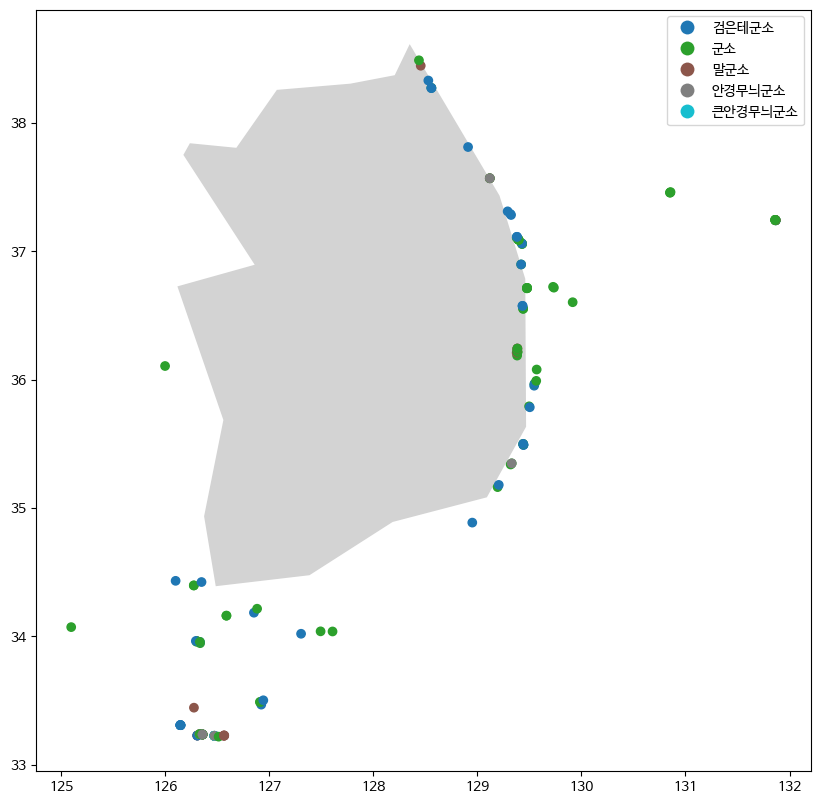

In [ ]:
ax = korea.plot(color='lightgrey', figsize=(10, 10))    # 차트의 순서를 지정 
gdf_pt4.plot('comm_kor_nm',categorical=True, legend=True, ax=ax)